### NOTE BOOK COVERS
1. Understand the requirement/Problem statement
2. Preprocessing
3. EDA
4. Imputation
5. Standardization
6. Encodings
7. Pipeline
8. Models
9. Finetune 
10. cross validation
11. Grids
12. Pickling
13. stacking
14. voting
15. streamlit Create UI and link 
16. Deployment

### 1. Understand the requirement/Problem statement

Credit Risk in Fintech Industry. You are required to build and train a model that identifies Fully Paid and Charged-off loans from the loan dataset.
Task:
Your task is to build this model based on the details in this document and submit it. 


Consider these Factors before building the Models:
1.	Use the specific source or dataset for assess credit risk shared with you
2.	What is your intended data split ratio for training, validation, and test sets for the loan dataset? How do you plan to ensure randomness in this split?
3.	Do you plan to explore the importance of these components further?
4.	Do you anticipate class imbalance in the 'loan_status' feature, where 
Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. Client has defaulted on the loan
If so, how will you address this imbalance?
5.	Will you normalize the features? If yes, what normalization techniques do you have in mind?
6.	Do you intend to perform data preprocessing tasks such as outlier detection, missing value handling, or feature selection before training your model.

### 2. Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("../data/train_loan_data.csv")

In [3]:
data # to see sample data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-2000,10+ years,Sports Group Manager,664.0,660.0,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201.0,93.5,G3,60 months,Debt consolidation,42.0,Verified,Charged Off
79996,NH,45000.0,Aug-1995,10+ years,Web Designer,684.0,680.0,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145.0,56.9,C1,36 months,Debt consolidation,14.0,Not Verified,Fully Paid
79997,NY,90000.0,Apr-2005,< 1 year,Program Officer,724.0,720.0,B,OWN,Individual,...,0.0,debt_consolidation,3910.0,25.6,B4,36 months,Debt consolidation,26.0,Source Verified,Fully Paid
79998,TX,94000.0,Apr-1992,3 years,Sr. Business Analyst,669.0,665.0,D,MORTGAGE,Individual,...,1.0,credit_card,11897.0,49.4,D5,60 months,Credit card refinancing,48.0,Source Verified,Fully Paid


In [4]:
data.info() # to view entire column info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [5]:
data.describe() # to get all the stats details of numerical columns

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [6]:
data.shape #(rows x columns)

(80000, 28)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

### Handling Missing values

    1.Drop the row
    2.Replace with the statistical properties(Mean, Median and Mode)
    3.Replace with a imputation
    4.Create a new category label


Before dropping any columns are columns analyze how significate these columns to identify credit risk (domain expertise required) 

In [9]:
# Employment length in years. 
# Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

data.emp_length.unique() # 4588 nulls

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [10]:
# The job title supplied by the Borrower when applying for the loan.
data.emp_title.unique() # 5018 nulls

array(['Deputy', 'Department of Veterans Affairs', 'Marble polishing',
       ..., 'COAL MINER', 'repair tec', 'Sports Group Manager'],
      dtype=object)

In [11]:
# Number of currently active bankcard accounts.
data.num_actv_bc_tl.unique() # 3948 nulls

array([ 1.,  4., 14., nan,  2.,  3.,  6.,  5.,  8.,  0.,  9.,  7., 11.,
       10., 17., 13., 12., 19., 25., 16., 15., 20., 18., 24., 21., 22.,
       26., 27., 32.])

In [12]:
# Number of mortgage accounts.
data.mort_acc.unique() # 2771 nulls

array([ 1.,  0.,  2.,  7.,  4., nan,  3.,  5.,  8., 12.,  9.,  6., 10.,
       11., 13., 16., 14., 26., 18., 15., 32., 22., 19., 20., 27., 31.,
       17., 24., 29.])

In [13]:
# Total current balance of all accounts
data.tot_cur_bal.unique() # 3948 nulls

array([ 319479.,   19944.,   23199., ...,  382274.,  201841., 3046776.])

In [14]:
# Number of public record bankruptcies.
data.pub_rec_bankruptcies.unique() # 31 nulls

array([ 0.,  1.,  2.,  3.,  5., nan,  4.,  7.,  6.])

In [15]:
# Revolving line utilization rate, 
#or the amount of credit the borrower is using relative to all available revolving credit.

data.revol_util.unique() # 53 nulls

array([ 93.6,  60.3,  88.5, ..., 108. , 121.5, 113. ])

In [16]:
# The loan title provided by the borrower
data.title.unique() # 970 nulls

array(['Debt consolidation', 'Credit Loan', 'Debt Connsolidation', ...,
       'cr card payoff', 'Debt in one place', 'Consolidate 2012'],
      dtype=object)

### Anlayze outliers for the numerical columns to replace missing values with mean or median

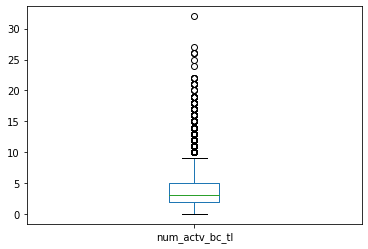

In [17]:
data['num_actv_bc_tl'].plot(kind= 'box') # Have outliers imputation using median

In [18]:
data['num_actv_bc_tl'].mean()

3.6337900383947823

In [19]:
data['num_actv_bc_tl'].median()

3.0

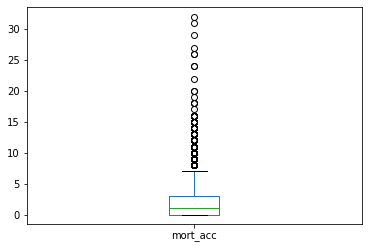

In [20]:
data['mort_acc'].plot(kind= 'box') # Have outliers imputation using median 

In [21]:
data['mort_acc'].mean()

1.6747594815419078

In [22]:
data['mort_acc'].median()

1.0

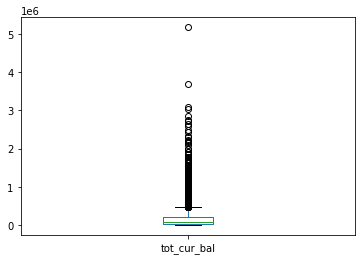

In [23]:
data.tot_cur_bal.plot(kind= 'box') # Have outliers imputation using median 

In [24]:
data.tot_cur_bal.mean()

141586.35899121655

In [25]:
data.tot_cur_bal.median()

81000.5

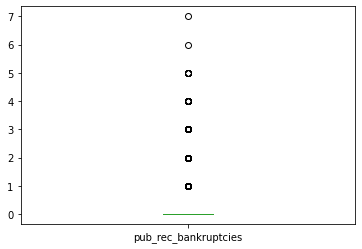

In [26]:
data.pub_rec_bankruptcies.plot(kind= 'box') # Have outliers imputation using median 

In [27]:
data.pub_rec_bankruptcies.mean() 

0.1371031274618915

In [28]:
data.pub_rec_bankruptcies.median()

0.0

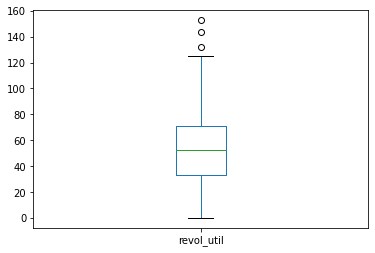

In [29]:
data.revol_util.plot(kind= 'box') # Have outliers imputation using median

In [30]:
data.revol_util.mean() 

51.8991423067781

In [31]:
data.revol_util.median()

52.2

## split data to numeric and categorical

### Numerical data analysis along with imputation to fill na's and minmax encoding to Standardize the data.

In [32]:
numerical_data = data.select_dtypes(include=np.number)

In [33]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            80000 non-null  float64
 1   fico_range_high       80000 non-null  float64
 2   fico_range_low        80000 non-null  float64
 3   int_rate              80000 non-null  float64
 4   loan_amnt             80000 non-null  float64
 5   num_actv_bc_tl        76052 non-null  float64
 6   mort_acc              77229 non-null  float64
 7   tot_cur_bal           76052 non-null  float64
 8   open_acc              80000 non-null  float64
 9   pub_rec               80000 non-null  float64
 10  pub_rec_bankruptcies  79969 non-null  float64
 11  revol_bal             80000 non-null  float64
 12  revol_util            79947 non-null  float64
 13  total_acc             80000 non-null  float64
dtypes: float64(14)
memory usage: 8.5 MB


In [34]:
numerical_data

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
0,85000.0,744.0,740.0,18.99,18075.0,1.0,1.0,319479.0,7.0,0.0,0.0,5338.0,93.6,8.0
1,40000.0,724.0,720.0,10.16,8800.0,4.0,0.0,19944.0,5.0,0.0,0.0,19944.0,60.3,12.0
2,60000.0,679.0,675.0,11.47,18000.0,4.0,2.0,23199.0,7.0,0.0,0.0,23199.0,88.5,16.0
3,100742.0,664.0,660.0,9.16,20000.0,4.0,1.0,72651.0,12.0,0.0,0.0,18425.0,69.0,19.0
4,80000.0,669.0,665.0,23.83,35000.0,14.0,7.0,64631.0,23.0,0.0,0.0,34370.0,90.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,664.0,660.0,25.89,25850.0,5.0,4.0,220521.0,12.0,0.0,0.0,20201.0,93.5,42.0
79996,45000.0,684.0,680.0,12.29,6975.0,2.0,2.0,245781.0,7.0,0.0,0.0,6145.0,56.9,14.0
79997,90000.0,724.0,720.0,10.99,7000.0,1.0,3.0,382274.0,9.0,0.0,0.0,3910.0,25.6,26.0
79998,94000.0,669.0,665.0,19.47,18000.0,3.0,3.0,201841.0,16.0,1.0,1.0,11897.0,49.4,48.0


In [35]:
numerical_data.isna().sum()

annual_inc                 0
fico_range_high            0
fico_range_low             0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
revol_bal                  0
revol_util                53
total_acc                  0
dtype: int64

In [36]:
clone_numeric_data = numerical_data.copy()

In [37]:
numerical_data.columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [38]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(clone_numeric_data[numerical_data.columns])
imputed_numeric_data = imputer.fit_transform(clone_numeric_data[numerical_data.columns])

In [39]:
imputed_numeric_data

array([[8.50000e+04, 7.44000e+02, 7.40000e+02, ..., 5.33800e+03,
        9.36000e+01, 8.00000e+00],
       [4.00000e+04, 7.24000e+02, 7.20000e+02, ..., 1.99440e+04,
        6.03000e+01, 1.20000e+01],
       [6.00000e+04, 6.79000e+02, 6.75000e+02, ..., 2.31990e+04,
        8.85000e+01, 1.60000e+01],
       ...,
       [9.00000e+04, 7.24000e+02, 7.20000e+02, ..., 3.91000e+03,
        2.56000e+01, 2.60000e+01],
       [9.40000e+04, 6.69000e+02, 6.65000e+02, ..., 1.18970e+04,
        4.94000e+01, 4.80000e+01],
       [1.10000e+06, 6.64000e+02, 6.60000e+02, ..., 5.86259e+05,
        9.67000e+01, 3.20000e+01]])

In [40]:
imputed_numeric_dataframe = pd.DataFrame(imputed_numeric_data,columns=numerical_data.columns)

In [41]:
imputed_numeric_dataframe

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
0,85000.0,744.0,740.0,18.99,18075.0,1.0,1.0,319479.0,7.0,0.0,0.0,5338.0,93.6,8.0
1,40000.0,724.0,720.0,10.16,8800.0,4.0,0.0,19944.0,5.0,0.0,0.0,19944.0,60.3,12.0
2,60000.0,679.0,675.0,11.47,18000.0,4.0,2.0,23199.0,7.0,0.0,0.0,23199.0,88.5,16.0
3,100742.0,664.0,660.0,9.16,20000.0,4.0,1.0,72651.0,12.0,0.0,0.0,18425.0,69.0,19.0
4,80000.0,669.0,665.0,23.83,35000.0,14.0,7.0,64631.0,23.0,0.0,0.0,34370.0,90.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,664.0,660.0,25.89,25850.0,5.0,4.0,220521.0,12.0,0.0,0.0,20201.0,93.5,42.0
79996,45000.0,684.0,680.0,12.29,6975.0,2.0,2.0,245781.0,7.0,0.0,0.0,6145.0,56.9,14.0
79997,90000.0,724.0,720.0,10.99,7000.0,1.0,3.0,382274.0,9.0,0.0,0.0,3910.0,25.6,26.0
79998,94000.0,669.0,665.0,19.47,18000.0,3.0,3.0,201841.0,16.0,1.0,1.0,11897.0,49.4,48.0


In [42]:
imputed_numeric_dataframe.info()
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            80000 non-null  float64
 1   fico_range_high       80000 non-null  float64
 2   fico_range_low        80000 non-null  float64
 3   int_rate              80000 non-null  float64
 4   loan_amnt             80000 non-null  float64
 5   num_actv_bc_tl        80000 non-null  float64
 6   mort_acc              80000 non-null  float64
 7   tot_cur_bal           80000 non-null  float64
 8   open_acc              80000 non-null  float64
 9   pub_rec               80000 non-null  float64
 10  pub_rec_bankruptcies  80000 non-null  float64
 11  revol_bal             80000 non-null  float64
 12  revol_util            80000 non-null  float64
 13  total_acc             80000 non-null  float64
dtypes: float64(14)
memory usage: 8.5 MB
<class 'pandas.core.frame.DataFram

In [43]:
imputed_numeric_dataframe.isna().sum()

annual_inc              0
fico_range_high         0
fico_range_low          0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
revol_util              0
total_acc               0
dtype: int64

### categorical data analysis along with imputation to fill na's and onehot encoding to Standardize the data.

In [44]:
categorical_data = data.select_dtypes(exclude = np.number)

In [45]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   addr_state           80000 non-null  object
 1   earliest_cr_line     80000 non-null  object
 2   emp_length           75412 non-null  object
 3   emp_title            74982 non-null  object
 4   grade                80000 non-null  object
 5   home_ownership       80000 non-null  object
 6   application_type     80000 non-null  object
 7   initial_list_status  80000 non-null  object
 8   purpose              80000 non-null  object
 9   sub_grade            80000 non-null  object
 10  term                 80000 non-null  object
 11  title                79030 non-null  object
 12  verification_status  80000 non-null  object
 13  loan_status          80000 non-null  object
dtypes: object(14)
memory usage: 8.5+ MB


In [46]:
categorical_data.isna().sum()

addr_state                0
earliest_cr_line          0
emp_length             4588
emp_title              5018
grade                     0
home_ownership            0
application_type          0
initial_list_status       0
purpose                   0
sub_grade                 0
term                      0
title                   970
verification_status       0
loan_status               0
dtype: int64

In [47]:
clone_categorical_data = categorical_data.copy()

In [48]:
categorical_data.columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

In [49]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(clone_categorical_data[categorical_data.columns])
imputed_categorical_data = imputer.fit_transform(clone_categorical_data[categorical_data.columns])

In [50]:
imputed_categorical_data

array([['CO', 'Jul-1997', '10+ years', ..., 'Debt consolidation',
        'Source Verified', 'Charged Off'],
       ['CA', 'Apr-1987', '10+ years', ..., 'Credit Loan', 'Verified',
        'Fully Paid'],
       ['FL', 'Aug-2007', '10+ years', ..., 'Debt consolidation',
        'Source Verified', 'Fully Paid'],
       ...,
       ['NY', 'Apr-2005', '< 1 year', ..., 'Debt consolidation',
        'Source Verified', 'Fully Paid'],
       ['TX', 'Apr-1992', '3 years', ..., 'Credit card refinancing',
        'Source Verified', 'Fully Paid'],
       ['NY', 'Jun-1999', '2 years', ..., 'Debt consolidation',
        'Source Verified', 'Fully Paid']], dtype=object)

In [51]:
imputed_categorical_dataframe = pd.DataFrame(imputed_categorical_data,columns=categorical_data.columns)

In [52]:
imputed_categorical_dataframe

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
0,CO,Jul-1997,10+ years,Deputy,E,MORTGAGE,Individual,w,debt_consolidation,E1,60 months,Debt consolidation,Source Verified,Charged Off
1,CA,Apr-1987,10+ years,Department of Veterans Affairs,B,RENT,Individual,w,debt_consolidation,B1,36 months,Credit Loan,Verified,Fully Paid
2,FL,Aug-2007,10+ years,Marble polishing,B,MORTGAGE,Individual,w,debt_consolidation,B5,36 months,Debt consolidation,Source Verified,Fully Paid
3,IL,Sep-1980,10+ years,printer,B,MORTGAGE,Individual,w,debt_consolidation,B2,36 months,Debt consolidation,Source Verified,Fully Paid
4,MD,Jul-1999,10+ years,Southern Mgmt,F,RENT,Individual,f,debt_consolidation,F5,60 months,Debt Connsolidation,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,Feb-2000,10+ years,Sports Group Manager,G,MORTGAGE,Individual,w,debt_consolidation,G3,60 months,Debt consolidation,Verified,Charged Off
79996,NH,Aug-1995,10+ years,Web Designer,C,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Not Verified,Fully Paid
79997,NY,Apr-2005,< 1 year,Program Officer,B,OWN,Individual,w,debt_consolidation,B4,36 months,Debt consolidation,Source Verified,Fully Paid
79998,TX,Apr-1992,3 years,Sr. Business Analyst,D,MORTGAGE,Individual,w,credit_card,D5,60 months,Credit card refinancing,Source Verified,Fully Paid


In [53]:
imputed_categorical_dataframe.info()
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   addr_state           80000 non-null  object
 1   earliest_cr_line     80000 non-null  object
 2   emp_length           80000 non-null  object
 3   emp_title            80000 non-null  object
 4   grade                80000 non-null  object
 5   home_ownership       80000 non-null  object
 6   application_type     80000 non-null  object
 7   initial_list_status  80000 non-null  object
 8   purpose              80000 non-null  object
 9   sub_grade            80000 non-null  object
 10  term                 80000 non-null  object
 11  title                80000 non-null  object
 12  verification_status  80000 non-null  object
 13  loan_status          80000 non-null  object
dtypes: object(14)
memory usage: 8.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0

In [54]:
imputed_categorical_dataframe.isna().sum()

addr_state             0
earliest_cr_line       0
emp_length             0
emp_title              0
grade                  0
home_ownership         0
application_type       0
initial_list_status    0
purpose                0
sub_grade              0
term                   0
title                  0
verification_status    0
loan_status            0
dtype: int64

In [66]:
onehotencoder = OneHotEncoder()

In [67]:
 X = onehotencoder.fit_transform(imputed_categorical_dataframe.values.reshape(-1,1))

In [68]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120000 entries, 0 to 1119999
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1120000 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


In [265]:
# class CustomTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self,strategy):
#         self.strategy = strategy
        
#     def fit(self, X):
#         self.imputer = SimpleImputer(missing_values=np.nan, strategy=self.strategy)
#         self.imputer.fit(X)
#         return self
    
#     def transform(self, X):
#         return self.imputer.transform(X)
    

### 4. Imputation  5. Standardization  6. Encodings

In [145]:
numerical_imputer = Pipeline([
    ('imputation', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_imputer = Pipeline([
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('label', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [146]:

preprocess_full = ColumnTransformer(
    transformers=
    [
        ('numerical_preprocessing',numerical_imputer,numerical_data.columns),
        ('categorical_preprocessing',categorical_imputer,categorical_data.columns)
    ]
)



### 7. Pipeline

In [147]:
pipe = Pipeline([
         ('preprocess',preprocess_full),
         ('model',LogisticRegression())])



### 8. Models

In [148]:
from sklearn import set_config
set_config(display='diagram')  
display(pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [ ]:
filled = preprocess_full.fit_transform(data)

In [ ]:
filled.

In [59]:
pd.DataFrame(filled,columns=data.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   addr_state            80000 non-null  object
 1   annual_inc            80000 non-null  object
 2   earliest_cr_line      80000 non-null  object
 3   emp_length            80000 non-null  object
 4   emp_title             80000 non-null  object
 5   fico_range_high       80000 non-null  object
 6   fico_range_low        80000 non-null  object
 7   grade                 80000 non-null  object
 8   home_ownership        80000 non-null  object
 9   application_type      80000 non-null  object
 10  initial_list_status   80000 non-null  object
 11  int_rate              80000 non-null  object
 12  loan_amnt             80000 non-null  object
 13  num_actv_bc_tl        80000 non-null  object
 14  mort_acc              80000 non-null  object
 15  tot_cur_bal           80000 non-null

In [ ]:
pd.DataFrame(filled,columns=data.columns).info()

In [56]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [74]:
categorical_data

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
0,CO,Jul-1997,10+ years,Deputy,E,MORTGAGE,Individual,w,debt_consolidation,E1,60 months,Debt consolidation,Source Verified,Charged Off
1,CA,Apr-1987,10+ years,Department of Veterans Affairs,B,RENT,Individual,w,debt_consolidation,B1,36 months,Credit Loan,Verified,Fully Paid
2,FL,Aug-2007,10+ years,Marble polishing,B,MORTGAGE,Individual,w,debt_consolidation,B5,36 months,Debt consolidation,Source Verified,Fully Paid
3,IL,Sep-1980,10+ years,printer,B,MORTGAGE,Individual,w,debt_consolidation,B2,36 months,Debt consolidation,Source Verified,Fully Paid
4,MD,Jul-1999,10+ years,Southern Mgmt,F,RENT,Individual,f,debt_consolidation,F5,60 months,Debt Connsolidation,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,Feb-2000,10+ years,Sports Group Manager,G,MORTGAGE,Individual,w,debt_consolidation,G3,60 months,Debt consolidation,Verified,Charged Off
79996,NH,Aug-1995,10+ years,Web Designer,C,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Not Verified,Fully Paid
79997,NY,Apr-2005,< 1 year,Program Officer,B,OWN,Individual,w,debt_consolidation,B4,36 months,Debt consolidation,Source Verified,Fully Paid
79998,TX,Apr-1992,3 years,Sr. Business Analyst,D,MORTGAGE,Individual,w,credit_card,D5,60 months,Credit card refinancing,Source Verified,Fully Paid


In [49]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = imputer.fit_transform(clonedata)

df

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'CO'